In [ ]:
from torchvision.datasets import FGVCAircraft

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.ToTensor(),          # Convert to tensor
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_dataset = FGVCAircraft(root="./data", split="trainval", transform=transform, download=True)
test_dataset = FGVCAircraft(root="./data", split="test", transform=transform, download=True)
classes = train_dataset.classes

In [ ]:
#print(len(classes))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

A321


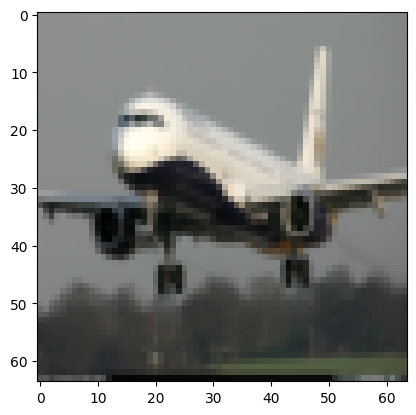

An-12


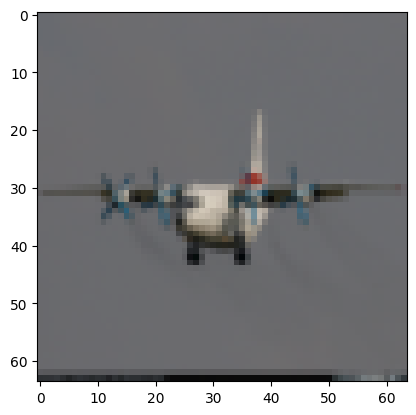

DHC-1


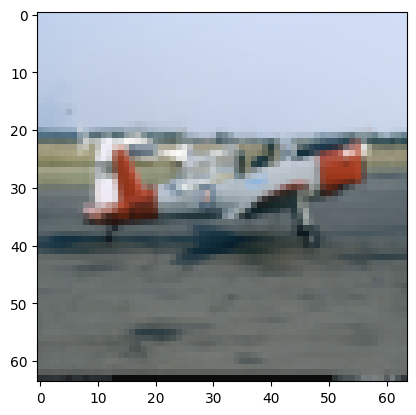

Yak-42


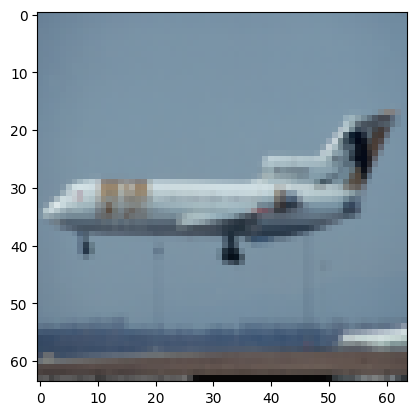

Spitfire


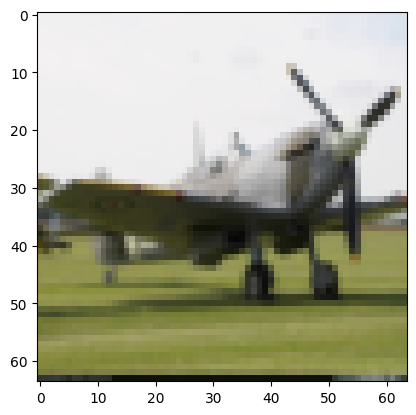

Fokker 100


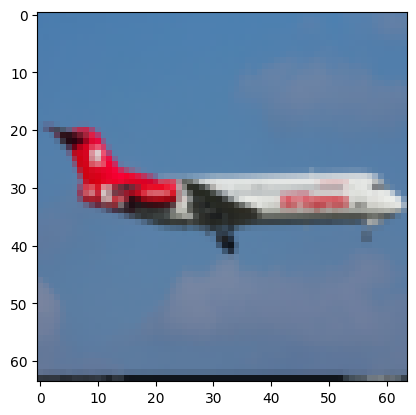

747-200


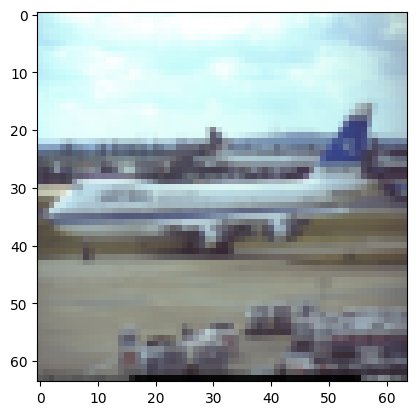

777-200


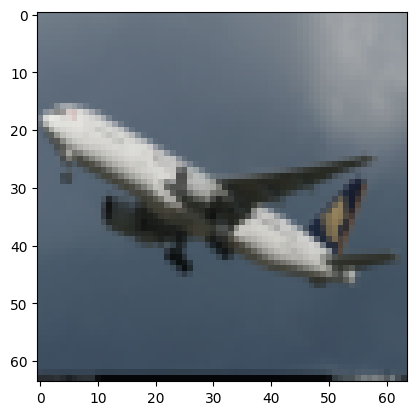

767-200


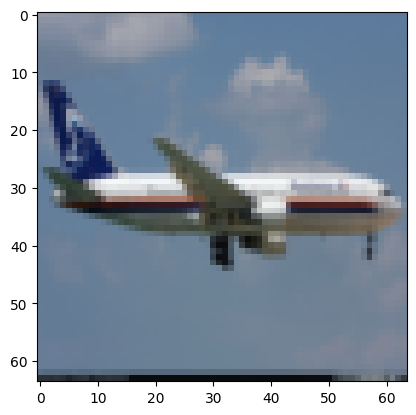

DHC-8-100


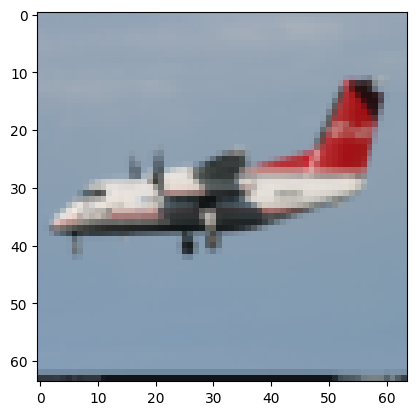

MD-11


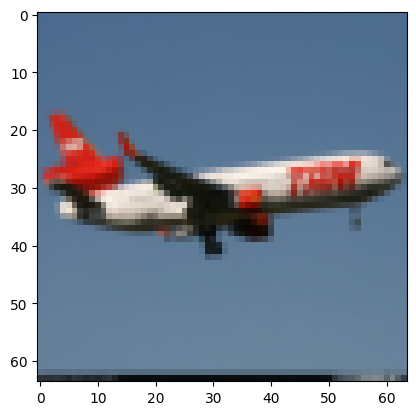

CRJ-700


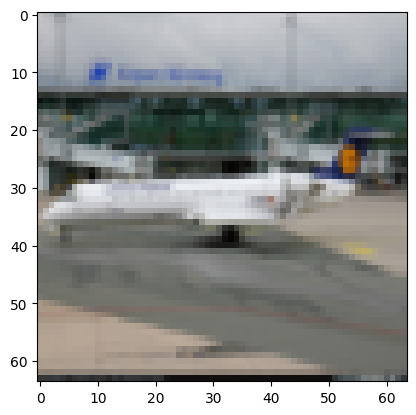

Il-76


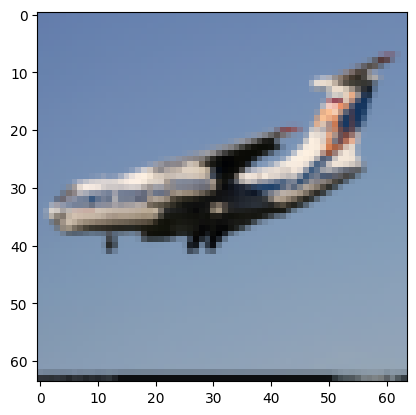

L-1011


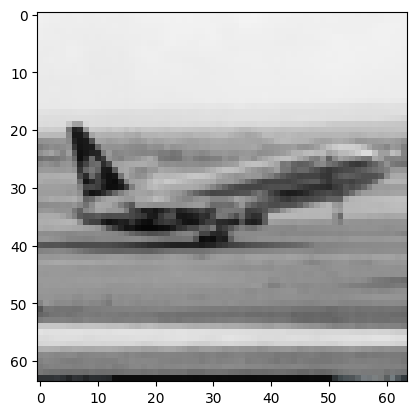

Global Express


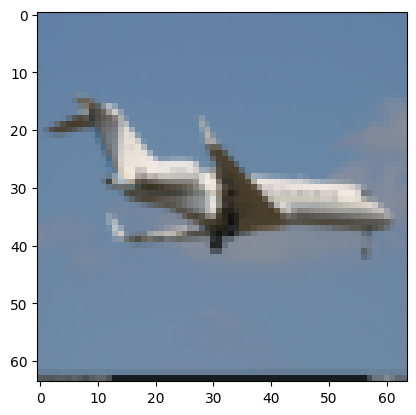

Cessna 208


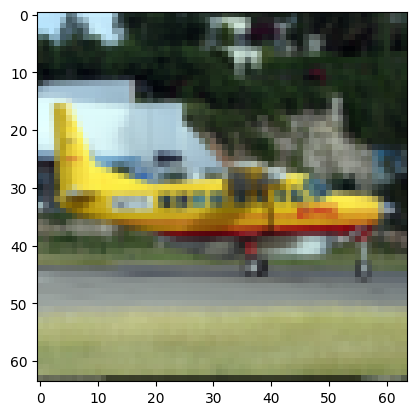

737-300


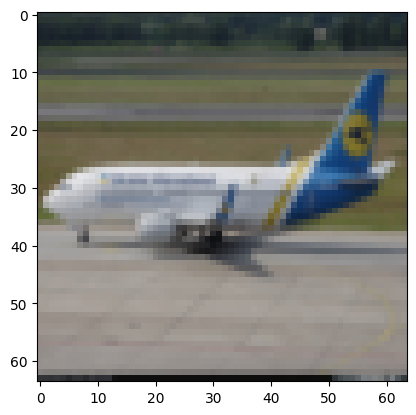

Il-76


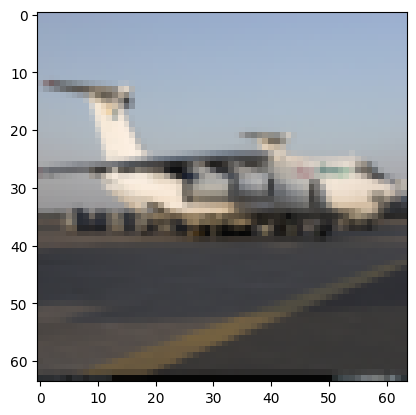

A330-200


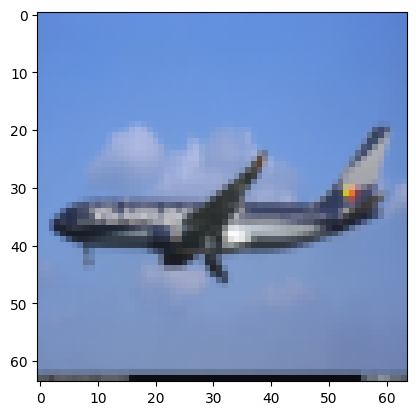

747-400


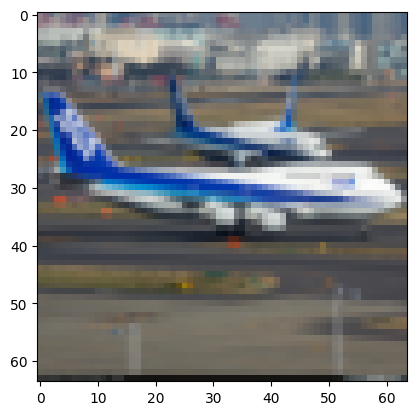

MD-11


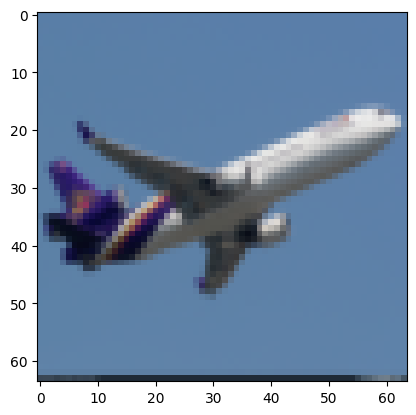

757-300


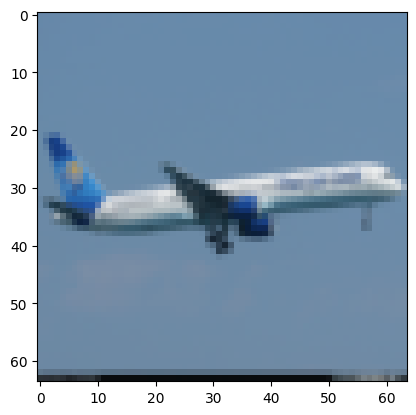

767-300


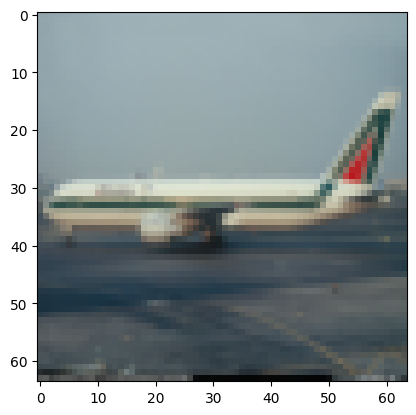

Spitfire


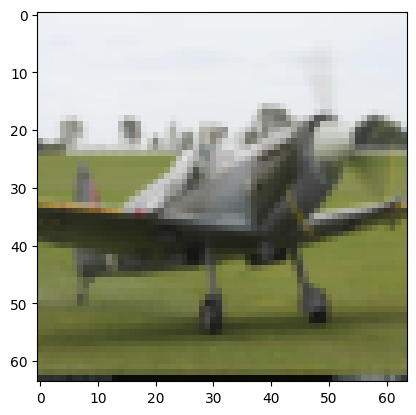

DHC-8-300


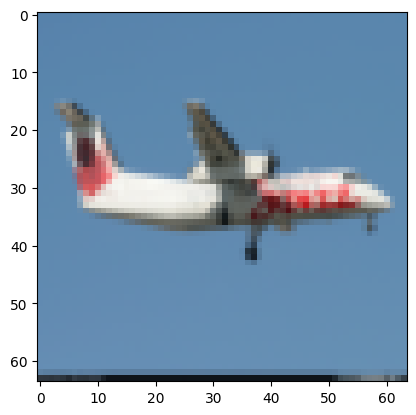

DHC-1


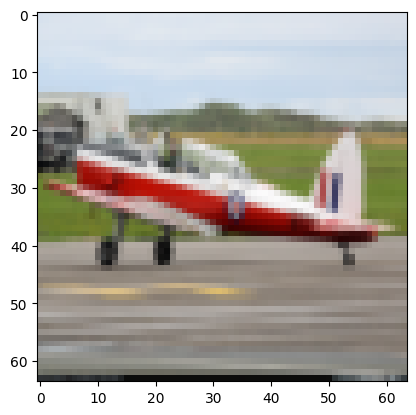

737-600


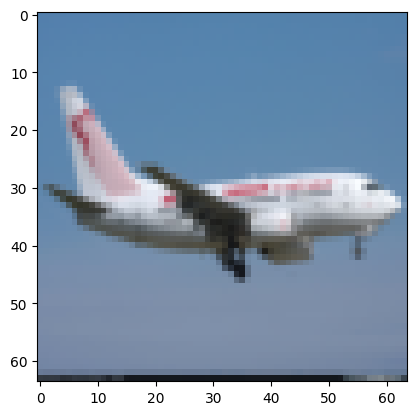

Dornier 328


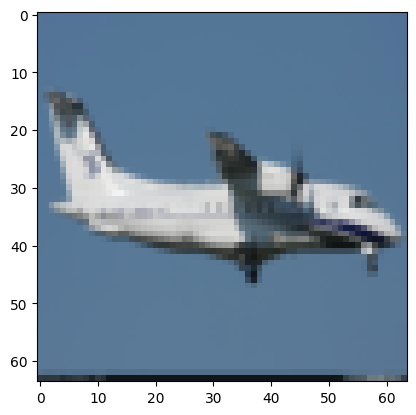

MD-80


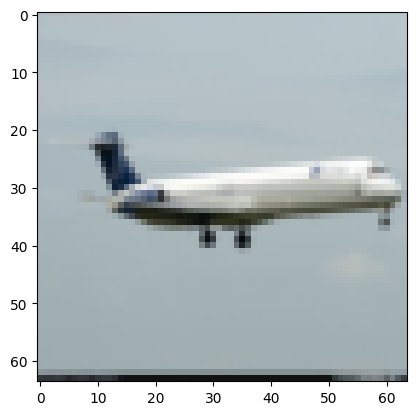

A340-500


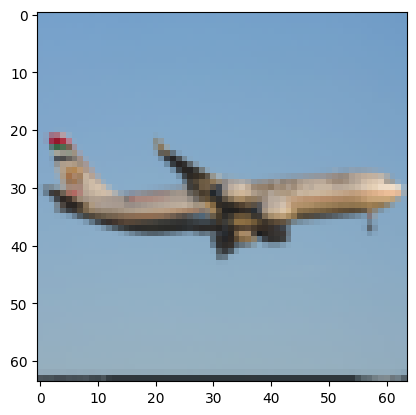

MD-80


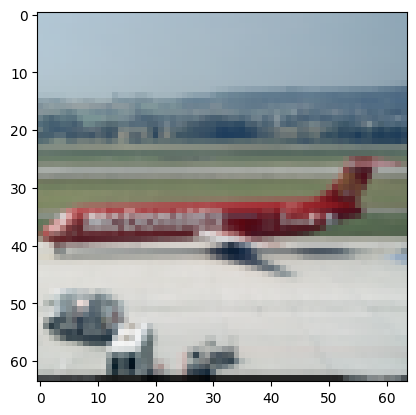

767-200


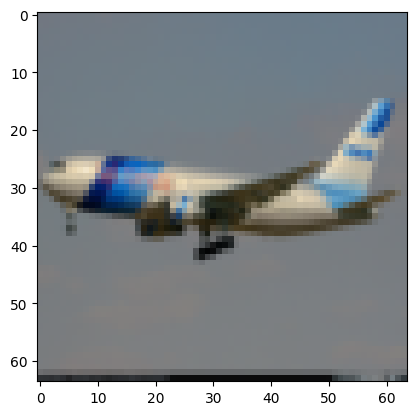

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    for i in range(32):
      print(classes[labels[i]])
      plt.imshow(images[i].permute(1, 2, 0))
      plt.show()
    break

In [ ]:
from torch import nn

class BaselineModel(nn.Module):
    def __init__(self, num_classes):
        super(BaselineModel, self).__init__()

        # Layer 1: Convolutional layer + ReLU (non-linear activation 1)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2: Convolutional layer + ReLU (non-linear activation 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3: Convolutional layer + ReLU (non-linear activation 3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 4: Fully connected layer + ReLU (non-linear activation 4)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 6 * 6 , 512)
        self.relu4 = nn.ReLU()

        # Layer 5: Fully connected layer + ReLU (non-linear activation 5)
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()

        # Output layer
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Apply layers
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))

        # Flatten
        x = self.flatten(x)

        # Fully connected layers
        x = self.relu4(self.fc1(x))
        x = self.relu5(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
model3 = BaselineModel(37)

In [ ]:
!pip install torchinfo

import torchinfo
torchinfo.summary(model=model3,
        input_size=(32, 3, 64, 64), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
BaselineModel (BaselineModel)            [32, 3, 64, 64]      [32, 37]             --                   True
├─Conv2d (conv1)                         [32, 3, 64, 64]      [32, 32, 62, 62]     896                  True
├─ReLU (relu1)                           [32, 32, 62, 62]     [32, 32, 62, 62]     --                   --
├─MaxPool2d (pool1)                      [32, 32, 62, 62]     [32, 32, 31, 31]     --                   --
├─Conv2d (conv2)                         [32, 32, 31, 31]     [32, 64, 29, 29]     18,496               True
├─ReLU (relu2)                           [32, 64, 29, 29]     [32, 64, 29, 29]     --                   --
├─MaxPool2d (pool2)                      [32, 64, 29, 29]     [32, 64, 14, 14]     --                   --
├─Conv2d (conv3)                         [32, 64, 14, 14]     [32, 128, 12, 12]    73,856               True
├─ReLU (relu3)        

In [ ]:
from torch import nn

class DropoutModel(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.3):
        super(DropoutModel, self).__init__()

        # Layer 1: Convolutional layer + ReLU (non-linear activation 1)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.dropout1 = nn.Dropout(dropout_rate)

        # Layer 2: Convolutional layer + ReLU (non-linear activation 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.dropout2 = nn.Dropout(dropout_rate)

        # Layer 3: Convolutional layer + ReLU (non-linear activation 3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.dropout3 = nn.Dropout(dropout_rate)

        # Layer 4: Fully connected layer + ReLU (non-linear activation 4)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_rate)

        # Layer 5: Fully connected layer + ReLU (non-linear activation 5)
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(dropout_rate)

        # Output layer
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Apply layers
        x = self.dropout1(self.pool1(self.relu1(self.conv1(x))))
        x = self.dropout2(self.pool2(self.relu2(self.conv2(x))))
        x = self.dropout3(self.pool3(self.relu3(self.conv3(x))))

        # Flatten
        x = x.view(-1, 128 * 8 * 8)

        # Fully connected layers
        x = self.dropout4(self.relu4(self.fc1(x)))
        x = self.dropout5(self.relu5(self.fc2(x)))
        x = self.fc3(x)

        return x


In [ ]:
import torch
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, scheduler=None):
    """
    Train the model and return training history

    Args:
        model: PyTorch model to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        optimizer: PyTorch optimizer
        criterion: Loss function
        num_epochs: Number of epochs to train
        scheduler: Optional learning rate scheduler

    Returns:
        train_loss_history, val_loss_history, val_acc_history: Training metrics
    """
    # Check for GPU availability
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model.to(device)
    train_loss_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        print(epoch)
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_loss_history.append(epoch_train_loss)

        # Validation
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)

                # Calculate accuracy
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = running_loss / len(val_loader.dataset)
        epoch_val_acc = 100 * correct / total
        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)


    return train_loss_history, val_loss_history, val_acc_history

def plot_training_results(train_loss_history, val_loss_history, val_acc_history):
    """
    Plot training results: loss and accuracy curves
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss curves
    epochs = range(1, len(train_loss_history) + 1)
    ax1.plot(epochs, train_loss_history, 'b-', label='Training Loss')
    ax1.plot(epochs, val_loss_history, 'r-', label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy curve
    ax2.plot(epochs, val_acc_history, 'g-', label='Validation Accuracy')
    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def test_model(model, test_loader):
    """
    Evaluate model on test dataset

    Args:
        model: Trained PyTorch model
        test_loader: DataLoader for test data

    Returns:
        accuracy: Test accuracy percentage
    """
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    return accuracy

def save_model(model, filepath='_classifier.pt'):
    """
    Save the trained model to a file

    Args:
        model: Trained PyTorch model
        filepath: Path to save the model
    """
    torch.save(model.state_dict(), filepath)
    print(f"Model saved to {filepath}")

def load_model(model_class, filepath='_classifier.pt', num_classes=37):
    """
    Load a trained model from a file

    Args:
        model_class: PyTorch model class
        filepath: Path to the saved model
        num_classes: Number of output classes

    Returns:
        model: Loaded model
    """
    model = model_class(num_classes)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load(filepath, map_location=device))
    model.to(device)
    model.eval()
    print(f"Model loaded from {filepath}")
    return model

Using device: cuda:0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


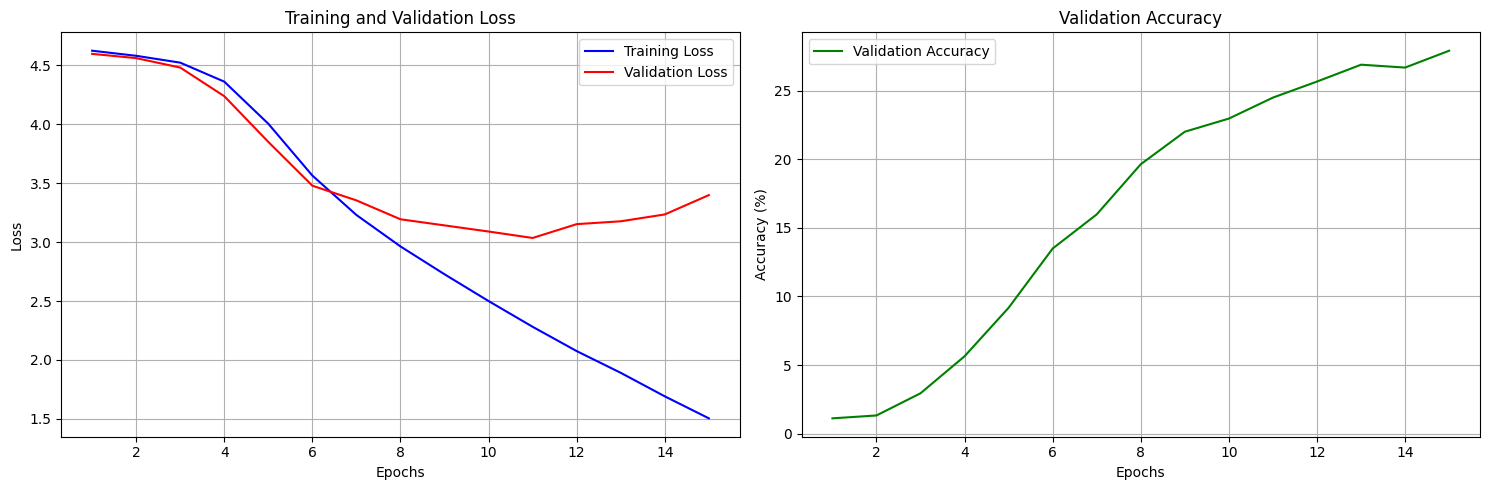

Test Accuracy: 27.93%
Model saved to pet_classifier_dropout.pt


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize your model
num_classes = 102
model = BaselineModel(num_classes=num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train model
train_loss, val_loss, val_acc = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=test_loader,  # Using test_loader as validation
    optimizer=optimizer,
    criterion=criterion,
    num_epochs=15,
    # scheduler=scheduler
)

# Plot results
plot_training_results(train_loss, val_loss, val_acc)

# Evaluate on test set
final_accuracy = test_model(model, test_loader)

# Save the model
save_model(model, filepath='_classifier_dropout.pt')

# To load the model later (uncomment when needed)
# loaded_model = load_model(DropoutModel, filepath='pet_classifier_dropout.pt')